<a href="https://colab.research.google.com/github/noahcowan1/noahcowan1.github.io/blob/master/Cowan_hw0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW0: PyTorch Primer

STATS305B, Stanford University, Winter 2024

**Your name:**

**Collaborators:**

**Hours spent:**

Please let us know how many hours in total you spent on this assignment so we can calibrate for future assignments. Your feedback is always welcome!

-----

We'll use Python and [PyTorch](https://pytorch.org/) for the assignments in this course. This lab is to help you get up to speed. It will introduce:
- **Tensors**: PyTorch's equivalent of NumPy arrays, but with more bells and whistles for running on GPUs and supporting automatic differentiation.
- **Broadcasting and Fancy Indexing**: If you're coming from Matlab or NumPy, you probably know that you can avoid costly for-loops by broadcasting computation over dimensions of an array (here, tensor) and using fancy indexing tricks.
- **Distributions**: PyTorch has an excellent library of distributions for sampling, evaluating log probabilities, and much more.


In [2]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt


torch.set_printoptions(precision=3, threshold=None, edgeitems=None,
                       linewidth=None, profile=None, sci_mode=None)
def prettyPrintAnswer(q, x):
    print(f"Problem {q} Tensor is: \n {x} \n")
    return None

## 1. Constructing Tensors

Tensors are PyTorch's equivalent of NumPy arrays. The PyTorch documentation already has a [great tutorial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) on tensors. Rather than recreate the wheel, please start by reading that.

Once you've read through that, try using torch functions like `arange`, `reshape`, etc. to construct the following tensors.

### Problem 1.1

Construct the following tensor:

```
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
```

_Note: For this problems and the ones below, don't literally construct the tensor from the specified list. Use torch functions._

---

In [3]:
x_1_1 = torch.arange(9).reshape((3,3))
prettyPrintAnswer("1.1", x_1_1)

Problem 1.1 Tensor is: 
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) 



### Problem 1.2

Construct the following tensor:

```
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

---

In [4]:
prettyPrintAnswer("1.2", x_1_1.t())

Problem 1.2 Tensor is: 
 tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]]) 



### Problem 1.3

Construct the following tensor:

```
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
```

_Note: Here the sequence is repeated 3 times. Does your code support arbitrary numbers of repeats?_

---

In [5]:
repeats = 3
# note that the desired tensor is (,15) not (1,15) so no second axis specified
x_1_3 = torch.arange(5).repeat(repeats)
prettyPrintAnswer("1.3", x_1_3)

Problem 1.3 Tensor is: 
 tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]) 



### Problem 1.4

Construct the following tensor:

```
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
```

---

In [6]:
x_1_4 = torch.arange(5).repeat(repeats, 1)
prettyPrintAnswer("1.4", x_1_4)

Problem 1.4 Tensor is: 
 tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]) 



### Problem 1.5

Construct the following tensor:

```
tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])
```

---

In [7]:
off_diag = torch.diag(-2*torch.ones(3), 1)
x_1_5 = torch.diag(torch.ones(4)) + off_diag + off_diag.t()
prettyPrintAnswer("1.5", x_1_5)

Problem 1.5 Tensor is: 
 tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]]) 



### Problem 1.6

Construct the following tensor:

```
tensor([[[[0, 1, 2]]]])
```

---

In [8]:
x_1_6 = torch.arange(3).reshape(1, 1, 1, 3)
prettyPrintAnswer("1.6", x_1_6)

Problem 1.6 Tensor is: 
 tensor([[[[0, 1, 2]]]]) 



## 2. Broadcasting and Fancy Indexing

Your life will be much easier and your code will be much faster once you get the hang of broadcasting and indexing. Start by reading the  [PyTorch documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

### Problem 2.1

Construct a tensor `X` where `X[i,j] = i + j` by broadcasting a sum of two 1-dimensional tensors.

For example, broadcast a sum to construct the following tensor,

```
tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])
```        

---

In [9]:
# want to make one tensor be row and one column
numrows = 4
numcols = 3
# This is a column (numrows x 1) tensor
row_ind = torch.arange(numrows).unsqueeze(1)
# This is a row (1 x numcols) tensor (unsqueeze isnt needed but I like it)
col_ind = torch.arange(numcols).unsqueeze(0)
x_2_1 = row_ind + col_ind # broadcasts each to (numrows x numcols)
prettyPrintAnswer("2.1", x_2_1)

Problem 2.1 Tensor is: 
 tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]) 



### Problem 2.2

Compute a distance matrix `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`, with

```
X = torch.arange(10, dtype=float).reshape(5, 2)
```

Your answer should be,

```
tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]])
```        

---

In [10]:
X = torch.arange(10, dtype=float).reshape(5, 2)
# broadcasts to (5, 1, 2) - (1, 5, 2) so each vector (the 2) gets copied
diffs = X.unsqueeze(1) - X
# square all the diffs, sum those squares (so sum along the 3rd axis), sqrt
dists = diffs.square().sum(axis=2).sqrt()
prettyPrintAnswer("2.2", dists)

Problem 2.2 Tensor is: 
 tensor([[ 0.000,  2.828,  5.657,  8.485, 11.314],
        [ 2.828,  0.000,  2.828,  5.657,  8.485],
        [ 5.657,  2.828,  0.000,  2.828,  5.657],
        [ 8.485,  5.657,  2.828,  0.000,  2.828],
        [11.314,  8.485,  5.657,  2.828,  0.000]], dtype=torch.float64) 



### Problem 2.3

Extract the submatrix of rows `[2,3]` and columns `[0,1,4]` of the tensor,
```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be,
```
tensor([[10, 11, 14],
        [15, 16, 19]])
```

---

In [11]:
A = torch.arange(25).reshape(5, 5)
rows = [2, 3]
columns = [0, 1,4]
# get all the rows we want, slice those rows down to just the columns we want.
x_2_3 = A[rows, :][:, columns]
prettyPrintAnswer("2.3", x_2_3)

Problem 2.3 Tensor is: 
 tensor([[10, 11, 14],
        [15, 16, 19]]) 



### Problem 2.4

Create a binary mask matrix `M` of the same shape as `A` where `M[i,j]` is True if and only if `A[i,j]` is divisible by 7. Let

```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be

```
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])
```

---

In [12]:
A = torch.arange(25).reshape(5, 5)
x_2_4 = A % 7 == 0
prettyPrintAnswer("2.4", x_2_4)

Problem 2.4 Tensor is: 
 tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]]) 



### Problem 2.5

Add one to the entries in `A` that are divisible by 7. After updating in place, `A` should be,

```
tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])
```

---

In [13]:
x_2_5 = A + x_2_4
prettyPrintAnswer("2.5", x_2_5)

Problem 2.5 Tensor is: 
 tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]]) 



## 3. Distributions

PyTorch has an excellent library of distributions in `torch.distributions`. Read the docs [here](https://pytorch.org/docs/stable/distributions.html).

We will use these distribution objects to construct and fit a Poisson mixture model.

### Problem 3.1

Draw 50 samples from a Poisson distribution with rate 10.

---

In [14]:
x_3_1 = dist.Poisson(10).sample((10, 5))
prettyPrintAnswer("3.1", x_3_1)

Problem 3.1 Tensor is: 
 tensor([[11.,  8., 15., 12.,  7.],
        [13., 17., 12.,  9., 10.],
        [13.,  9., 13.,  5.,  7.],
        [ 9.,  8.,  8.,  8.,  8.],
        [13.,  7., 13.,  8., 12.],
        [ 4., 12., 15., 11.,  9.],
        [ 9.,  9.,  7.,  5.,  8.],
        [ 7.,  5., 10.,  8.,  9.],
        [ 9.,  8.,  9., 14.,  8.],
        [ 8., 12., 13., 10., 16.]]) 



### Problem 3.2

One of the awesome thing about PyTorch distributions is that they support broadcasting too.

Construct a matrix `P` where `P[i,j]` equals $\mathrm{Pois}(x=j; \lambda=i)$ for $i=0,\ldots,4$ and $j=0,\ldots,4$.

Your answer should be,
```
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])
```

---

In [15]:
i_max = 5
j_max = 5
rate = dist.Poisson(torch.arange(i_max).unsqueeze(1))
val = torch.arange(j_max)
print(val.size())
P = rate.log_prob(val).exp()
prettyPrintAnswer("3.2", P)

torch.Size([5])
Problem 3.2 Tensor is: 
 tensor([[1.000, 0.000, 0.000, 0.000, 0.000],
        [0.368, 0.368, 0.184, 0.061, 0.015],
        [0.135, 0.271, 0.271, 0.180, 0.090],
        [0.050, 0.149, 0.224, 0.224, 0.168],
        [0.018, 0.073, 0.147, 0.195, 0.195]]) 



### Problem 3.3

Evaluate the log probability of the points `[1.5, 3., 4.2]` under a gamma distribution with shape (aka concentration) 2.0 and inverse scale (aka rate) 1.5.

Your answer should be,

```
tensor([-1.0336, -2.5905, -4.0540])
```

---

In [16]:
desired_x = [1.5, 3., 4.2]
x_3_3 = dist.Gamma(concentration=2.0, rate=1.5).log_prob(desired_x)
prettyPrintAnswer("3.3", x_3_3)

Problem 3.3 Tensor is: 
 tensor([-1.034, -2.590, -4.054]) 



### Problem 3.4

Draw 1000 samples from a Poisson mixture model,

$$
\begin{align*}
p(x) &= \frac{1}{2} \mathrm{Pois}(10.0) + \frac{1}{2} \mathrm{Pois}(2.0)
\end{align*}
$$

Use `matplotlib.pyplot.hist` to plot a normalized histogram of the samples.

---

In [17]:
mixing_probs = torch.tensor([.5, .5])
mixing_dist = dist.Categorical(mixing_probs)
component_dists = dist.Poisson(torch.tensor([10., 2.]))
model = dist.mixture_same_family.MixtureSameFamily(mixing_dist, component_dists)

data = model.sample([1000])

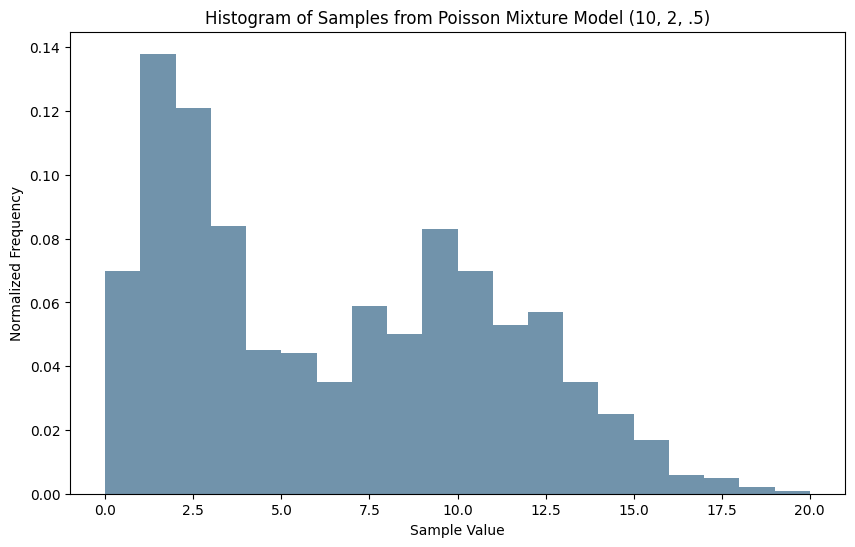

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data.numpy(), bins=20, density=True, alpha=0.6, color='#134b73')
plt.title('Histogram of Samples from Poisson Mixture Model (10, 2, .5)')
plt.xlabel('Sample Value')
plt.ylabel('Normalized Frequency')
plt.show()

## 4. PyTorch Distributions

### Problem 4.1

Use `dist.Normal` to draw a batch of shape `(100, 4)` independent standard normal random variables.

In [19]:
x_4_1 = dist.Normal(torch.zeros(1),
                    torch.ones(1)).sample((100,4)).reshape((100, 4))
prettyPrintAnswer("4.1", x_4_1)

Problem 4.1 Tensor is: 
 tensor([[ 1.673,  0.018,  0.768, -1.386],
        [ 1.135, -0.484, -0.092,  0.693],
        [-0.577,  0.004,  0.660,  1.832],
        [-0.094,  1.040,  0.696, -0.600],
        [-0.526, -0.998, -0.266, -0.594],
        [ 1.309, -0.903, -0.432, -0.059],
        [ 0.855,  1.146, -0.992,  1.534],
        [ 1.788, -0.585, -2.097,  1.334],
        [ 0.259, -1.170,  0.024, -0.850],
        [ 1.349,  0.031,  0.028,  0.873],
        [ 1.149, -0.015, -0.031, -0.415],
        [ 1.553, -2.570,  0.861,  1.915],
        [-0.551,  0.734,  0.806, -0.612],
        [-0.496, -0.217, -0.013,  2.288],
        [-1.348,  0.387, -0.582, -0.050],
        [-1.267,  1.786,  1.047,  0.924],
        [-0.729,  0.077, -0.107,  0.629],
        [ 0.037, -0.648,  0.267, -0.335],
        [ 1.026, -1.410,  0.897, -1.271],
        [-0.775,  0.485, -0.691, -0.267],
        [-0.027,  0.181, -0.347,  0.322],
        [ 1.524,  1.205,  0.473, -0.708],
        [ 1.230, -0.142,  1.010,  0.478],
        [

### Problem 4.2

Use `dist.Normal` to draw a batch independent normal random variables with shape `(5,5)`, variance 1.0, and means

```
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])
```

In [20]:
means = torch.arange(25).reshape((5,5)).float()
x_4_2 = dist.Normal(means, torch.tensor(1.0)).sample()
prettyPrintAnswer("4.2", x_4_2)

Problem 4.2 Tensor is: 
 tensor([[-1.559,  0.337,  3.102,  2.788,  5.598],
        [ 4.058,  4.133,  5.979,  6.125,  9.125],
        [ 9.497,  8.467, 13.235, 13.220, 15.321],
        [16.489, 16.146, 17.684, 18.016, 17.570],
        [19.276, 20.506, 22.445, 23.762, 24.245]]) 



## 5. Debugging

"If debugging is the process of removing bugs, then programming must be the process of putting them in." -Edsger Dijkstra

!["How I got better at debugging" by Julia Evans](https://wizardzines.com/images/uploads/better-at-debugging.png)

Debugging is an important skill in applied statistics that we will hone in this class. The following exercises will introduce you to useful python debugging tools and techniques.

!["If you understand a bug, you can fix it" by Julia Evans](https://wizardzines.com/images/uploads/understand-can-fix.png)

In particular, we will focus on giving you some tools that let you more directly interrogate what is happening in a code snippet. Hopefully, learning how to understand what is going on in a given code snippet will replace feelingness of powerlessness when encountering an inscrutable bug with confidence, mastery, and knowledge.



### Problem 5.1: sleuthing with `type`, `shape`, and `dir`

Many python bugs effectively arise from errors in grammar---trying to apply functions to objects in ways that don't make sense based on the type or shape of the object.

For example, in English, you can't say: "I enjoy to beautiful the park," because you have put an adjective ("beautiful") where a verb belongs. In a similar way, you can't evalaute the python expression `"number:" + 7`, because the `+` operator has different actions for strings and for ints.

So, when you encounter an unfamiliar object in the course of writing python code, instead of throwing spaghetti at the wall and seeing what sticks, it can be helpful to get to know the object better, in particular by asking what its `type` and, if applicable, `shape` is, as well as what attributes it has. This approach is similar how you might get to know a new friend, by asking the name, where the person is from, what the person does---you would not start by randomly guessing different names for a new person!

#### Problem 5.1.1

What is the type of `"number:"`? What is the type of `7`? What is the type of `A` from Problem 2.4?

Use the `type` function explicitly to answer this question.

In [21]:
num_str = "number:"
seven_int = 7

print(f"Type of '{num_str}' is:", type(num_str))
print(f"Type of {seven_int} is:", type(seven_int))
print("Type of A is:", type(A))

Type of 'number:' is: <class 'str'>
Type of 7 is: <class 'int'>
Type of A is: <class 'torch.Tensor'>


#### Problem 5.1.2

What are the shapes of `"number:"` and `7` and `A`? Can you give an intuitive reason why some types have shapes and other don't?

Call `.shape` on the above objects explicitly to answer this question

In [22]:
print(f"Shape of {num_str} is:", num_str.shape)

AttributeError: 'str' object has no attribute 'shape'

In [23]:
print(f"Shape of {seven_int} is:", seven_int.shape)

AttributeError: 'int' object has no attribute 'shape'

In [24]:
print("Shape of A is:", A.shape)

Shape of A is: torch.Size([5, 5])


It makes sense for a tensor to have a shape but ints and strings don't have shapes since they don't have methods defined for shape. Strings and integers have different predefined methods in python but shape is a numpy and tensorflow method for numpy and tensorflow objects.

#### Problem 5.1.3

Call `dir` on the three objects
* `"number:`
* `7`
* `A`

Describe what you notice. For each of the three objects, try out one of the methods that you get from calling `dir`. Does it have the behavior you would expect from the name? Describe why or why not.

In [25]:
print(f"dir of '{num_str}' is:", dir(num_str))
num_str.upper()

dir of 'number:' is: ['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


'NUMBER:'

Yes this is the behavior I expected. It made it all uppercase.

In [26]:
print(f"dir of {seven_int} is:", dir(seven_int))
seven_int.denominator

dir of 7 is: ['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


1

Yes this is the behavoir I expected. The denominator of an integer is 1.

In [27]:
print("dir of A is", dir(A))
A.sum()

dir of A is ['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__rmod_

tensor(300)

Yes this is the behavior I expected. It gave the sum of the whole thing.

### Problem 5.2: `pdb`


#### Problem 5.2.1: `%debug`

The `%` denotes a magic command, which opens up commands that are not in standard python, but are added by [IPython](https://ipython.org/), which is short for "Interactive Python" and is the backbone of JuPyter notebooks and colabs.

If you run a cell that returns an Error, in the very next cell you can just type `%debug` and then run the cell (Shft + Enter), and you open up a python debugger at the very point where the error was raised. Then, you can interactively investigate the values (as well as types and shapes) of the variables that were in and before the line that led to the crash. You can navigate through the debugger with these [commands](https://web.stanford.edu/class/physics91si/2013/handouts/Pdb_Commands.pdf)

Try running the following code (which has a bug). When it errors out, run `%debug` in the next cell. In the `ipd>` console, find the shapes of both `tensor_a` and `tensor_b` by asking for their shape, and explain why the code does't work. Exit the debugger with `quit()`.

In [31]:
# BUGGY CODE
tensor_a = torch.randn(2, 2)
tensor_b = torch.randn(3, 2)
result = tensor_a @ tensor_b

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x2 and 3x2)

In [32]:
%debug

> <ipython-input-31-0e8bd31d144a>(4)<cell line: 4>()
      1 # BUGGY CODE
      2 tensor_a = torch.randn(2, 2)
      3 tensor_b = torch.randn(3, 2)
----> 4 result = tensor_a @ tensor_b

ipdb> p tensor_a.shape
torch.Size([2, 2])
ipdb> p tensor_b.shape
torch.Size([3, 2])
ipdb> quit()


The code isn't working because we are trying to multiply a 2x2 matrix with a 3x2 matrix. Since the columns of the first matrix need to match the rows of the second, this particular multiplication isn't defined.

#### Problem 5.2.2: `breakpoint()`

Sometimes the bug can be more subtle, either not causing any error messages or having the bug be introduced many lines before the error is raised. In these situations, it can be helpful to add a `breakpoint()` to your code.

**Add a `breakpoint()` anywhere to the code snippet in Problem 5.2.1, and confirm that you can still print types, shapes, and values, and navigate using `pdb` commands.**

In [34]:
# BUGGY CODE
tensor_a = torch.randn(2, 2)
tensor_b = torch.randn(3, 2)
breakpoint()
result = tensor_a @ tensor_b

--Return--
None
> <ipython-input-34-73e51b25b4c4>(4)<cell line: 4>()
      1 # BUGGY CODE
      2 tensor_a = torch.randn(2, 2)
      3 tensor_b = torch.randn(3, 2)
----> 4 breakpoint()
      5 result = tensor_a @ tensor_b

ipdb> p type(tensor_a)
<class 'torch.Tensor'>
ipdb> p tensor_a.shape
torch.Size([2, 2])
ipdb> p tensor_a
tensor([[ 0.350,  1.570],
        [-0.439, -1.574]])
ipdb> p tensor_b
tensor([[ 1.004, -0.881],
        [-0.454, -0.280],
        [-2.215,  0.891]])
ipdb> quit()


### Problem 5.3: Debugging Linear Regression

Below is some buggy code for fitting linear regression on synthetic data that we will use to practice other debugging techniques

100%|██████████| 100/100 [00:00<00:00, 792.90it/s]


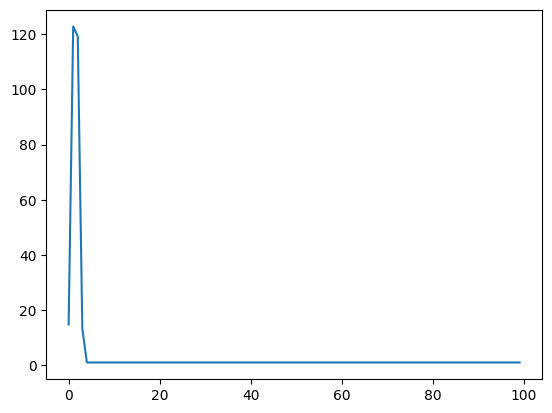

In [43]:
#BUGGY CODE
# generate synthetic data
torch.manual_seed(305)
n = 100_000
p = 3
X = torch.hstack([torch.ones((n,1)), torch.randn(n, p)])
beta_true = torch.randn(p+1)
y = X @ beta_true + torch.randn(n)

# set up logistic regression
loss_fn = torch.nn.MSELoss()
beta_hat = torch.randn(p+1, requires_grad=True)

learning_rate = 2.
num_iterations = 100

losses = []
# Gradient Descent
from tqdm import tqdm

for i in tqdm(range(num_iterations)):
    # Forward pass
    y_pred = X @ beta_hat

    # Compute and print loss
    loss = loss_fn(y_pred, y)
    losses.append(loss.item())

    # Zero the gradients before running the backward pass
    beta_hat.grad = None

    # Backward pass
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        beta_hat -= (learning_rate / (i+1)) * beta_hat.grad

# The final parameters after training
beta_final = beta_hat.detach()

plt.plot(losses)

assert torch.allclose(beta_true, beta_final, atol=1e-2), \
  f"beta_true is {beta_true} while beta_final is {beta_final}"

#### Problem 5.3.1: `assert` and `torch.allclose`

In the above code snippet, we would like to recover the true value `beta_true` of the linear regression coefficients in our final value `beta_final`. One way to check if two vectors are close each other is to use `torch.allclose`, which will return `True` if the two vectors have each corresponding element within `atol` of each other. One way to do this programatically is with an `assert`, which raises an error if the condition following it not true.

**Edit the above code snippet by adding an assert which checks if `beta_true` and `beta_final` are within a margin of `1e-2` elementwise.**

#### Problem 5.3.2: f-strings

It can be useful for debugging to print output, which can be done very cleanly using [f-strings](https://docs.python.org/3/tutorial/inputoutput.html) (the "f" stands for "formatted"). In particular, the second argument to an assert (after the boolean expression) can be a string that is printed if the boolean is `False`.

**Modify your assert so that if `beta_true` and `beta_final` are not true, their values are printed with a descrption of what they are, using f-strings for easy comparison.**

#### Problem 5.3.3: plotting

Use `matplotlib.pyplot`, which was imported in the very first cell as `plt`, to plot the lossess in the above code snippet. What do you notice about the losses? Does this clue you into the location of the bug? Fix the bug in the code snippet above.

#### Problem 5.3.4: progress bars

It's extremely nice to know how long code is going to take to run. One easy way to add this is to wrap for loops (like in the above code snippet) with progress bars. Probably the easiest way to do this is with the `tqdm` package, which can be as as easy as:

```
from tqdm import tqdm

for i in tqdm(range(10)):
  print(i)
```

**Add a progress bar to the above code snippet.**

#### Problem 5.3.5: timing

Often you want your code to run quickly when you are prototyping. How might you modify the above code snippet to run faster when you are just prototyping? Note that because you are "prototyping," your "quick-and-dirty" solution doesn't need to satisfy the asserts you set up in Problem 5.3.1.

But, **DO** confirm that your approach is faster by using `%%time`. Report your findings.

TODO: your summary of your timing experiments

In [46]:
%%time

for i in tqdm(range(num_iterations)):
    # Forward pass
    y_pred = X @ beta_hat

    # Compute and print loss
    loss = loss_fn(y_pred, y)
    losses.append(loss.item())

    # Zero the gradients before running the backward pass
    beta_hat.grad = None

    # Backward pass
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        beta_hat -= (learning_rate / (i+1)) * beta_hat.grad

# The final parameters after training
beta_final = beta_hat.detach()

100%|██████████| 100/100 [00:00<00:00, 817.09it/s]

CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 130 ms


In [48]:
%%time
beta_mult = torch.linalg.solve(X.t() @ X, X.t() @ y)

assert torch.allclose(beta_true, beta_mult, atol=1e-2), \
  f"beta_true is {beta_true} while beta_final is {beta_mult}"

CPU times: user 2.98 ms, sys: 0 ns, total: 2.98 ms
Wall time: 2.85 ms


Wow look at how much faster the exact projection of the $y$s onto $X\beta$ space is! It took 130 ms for the iterative solution while the exact solution only too 2.85 ms!

## 6. More resources

1. [CME 193: Introduction to Scientific Python](https://web.stanford.edu/class/cme193/)

An excellent 1-unit introduction to Python. Meets Wednesdays 11:30-12:30 in winter quarter. Strongly recommend concurrent enrollment if you are new to python.

2. [MIT's missing semester](https://missing.csail.mit.edu/)

An excellent introduction to software tools. While not directly related to Stats 305B, the tools reviewed in this series will make you a more confident programmer.

## 7. Submission Instructions

**Formatting:** check that your code does not exceed 80 characters in line width. You can set _Tools &rarr; Settings &rarr; Editor &rarr; Vertical ruler column_ to 80 to see when you've exceeded the limit.

**Converting to PDF** The simplest way to convert to PDF is to use the "Print to PDF" option in your browser. Just make sure that your code and plots aren't cut off, as it may not wrap lines.

**Alternatively** You can download your notebook in .ipynb format and use the following commands to convert it to PDF.  Then run the following command to convert to a PDF:
```
jupyter nbconvert --to pdf <yourlastname>_hw<number>.ipynb
```
(Note that for the above code to work, you need to rename your file `<yourlastname>_hw<number>.ipynb`)

**Installing nbconvert:**

If you're using Anaconda for package management,
```
conda install -c anaconda nbconvert
```

**Upload** your .pdf file to Gradescope. Please tag your questions correctly! I.E., for each question, all of and only the relevant sections are tagged.

Please post on Ed or come to OH if there are any other problems submitting the HW.